## Part A: Basic EDA

In [49]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [2]:
# Load the dataset and display the first 5 rows.
df = pd.read_csv("ai_assistant_usage_student_life.csv")
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
# Check the dataset shape (rows, columns).
df.shape

(10000, 11)

In [4]:
# Display column names and their data types.
df.dtypes


,0
SessionID,object
StudentLevel,object
Discipline,object
SessionDate,object
SessionLengthMin,float64
TotalPrompts,int64
TaskType,object
AI_AssistanceLevel,int64
FinalOutcome,object
UsedAgain,bool


In [5]:
# Check for missing values in each column.
df.isnull().sum()

,0
SessionID,0
StudentLevel,0
Discipline,0
SessionDate,0
SessionLengthMin,0
TotalPrompts,0
TaskType,0
AI_AssistanceLevel,0
FinalOutcome,0
UsedAgain,0


In [6]:
# Show summary statistics for SessionLengthMin and TotalPrompts.
df[["SessionLengthMin", "TotalPrompts"]].describe()

,SessionLengthMin,TotalPrompts
count,10000.000000,10000.000000
mean,19.846467,5.607500
std,13.897302,4.648764
min,0.030000,1.000000
25%,9.630000,2.000000
50%,16.650000,4.000000
75%,26.670000,8.000000
max,110.810000,39.000000


In [7]:
# Find the number of unique values in StudentLevel, Discipline, and TaskType.
df[["StudentLevel","Discipline","TaskType"]].nunique()

,0
StudentLevel,3
Discipline,7
TaskType,6


In [8]:
# Which TaskType is the most common?
df["TaskType"].value_counts()

,count
TaskType,
Writing,3101
Studying,2040
Homework Help,1959
Coding,1948
Brainstorming,476
Research,476


In [9]:
# Calculate the average SessionLengthMin for each StudentLevel.
avg_session_len = df.groupby("StudentLevel", as_index=False)["SessionLengthMin"].mean().round(2)
print(avg_session_len)

    StudentLevel  SessionLengthMin
0       Graduate             20.25
1    High School             20.02
2  Undergraduate             19.65


## Part B: Visualization

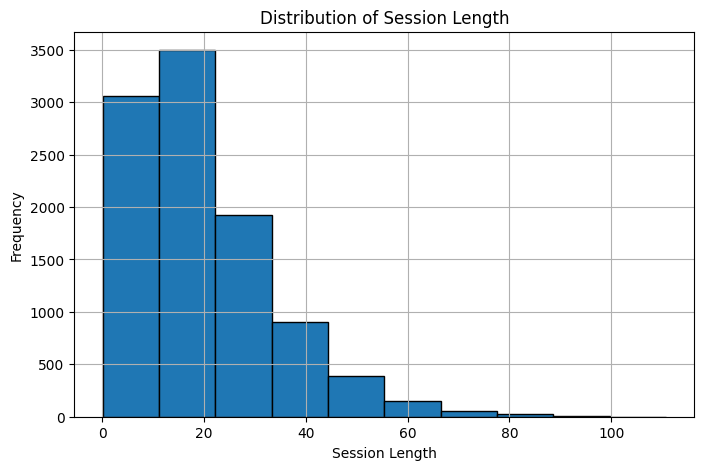

In [10]:
# Plot a histogram of SessionLengthMin.
plt.figure(figsize=(8,5))
plt.hist(x=df["SessionLengthMin"], bins=10, edgecolor="black")
plt.title("Distribution of Session Length")
plt.xlabel("Session Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [11]:
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


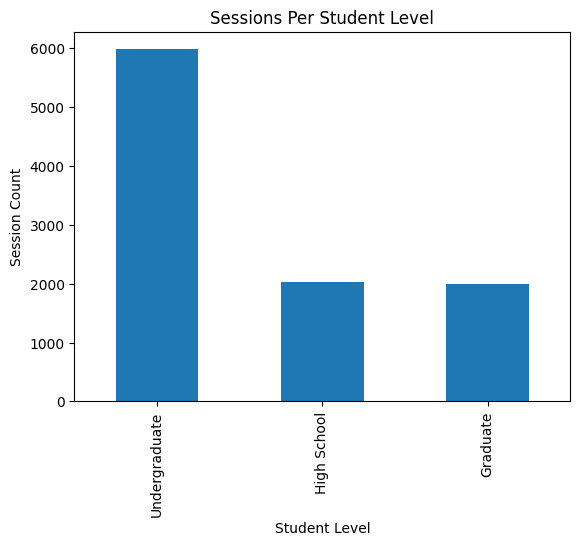

In [12]:
# Create a bar chart of session counts by StudentLevel.
session_count = df["StudentLevel"].value_counts()

session_count.plot(kind="bar")
plt.title("Sessions Per Student Level")
plt.xlabel("Student Level")
plt.ylabel("Session Count")
plt.show()

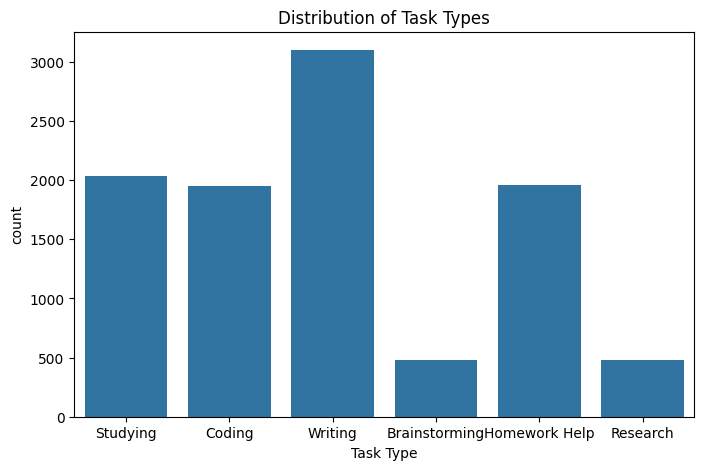

In [13]:
# Make a countplot of TaskType using Seaborn.
plt.figure(figsize=(8,5))
sns.countplot(x='TaskType', data=df)
plt.title("Distribution of Task Types")
plt.xlabel("Task Type")
plt.show()

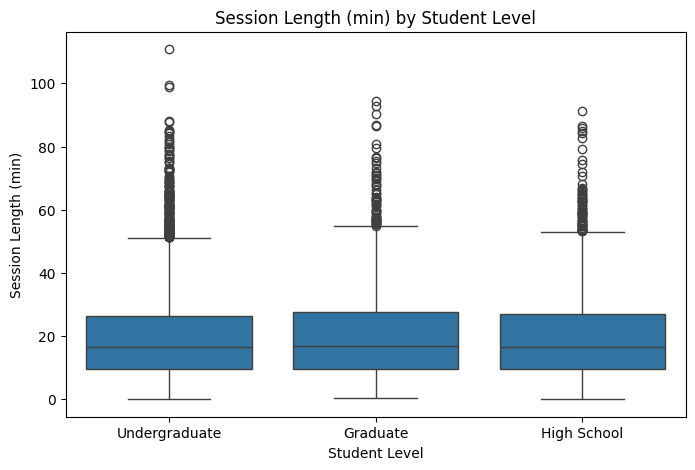

In [14]:
# Plot a boxplot of SessionLengthMin grouped by StudentLevel.
plt.figure(figsize=(8,5))
sns.boxplot(x="StudentLevel", y="SessionLengthMin", data=df)

plt.title("Session Length (min) by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Session Length (min)")
plt.show()

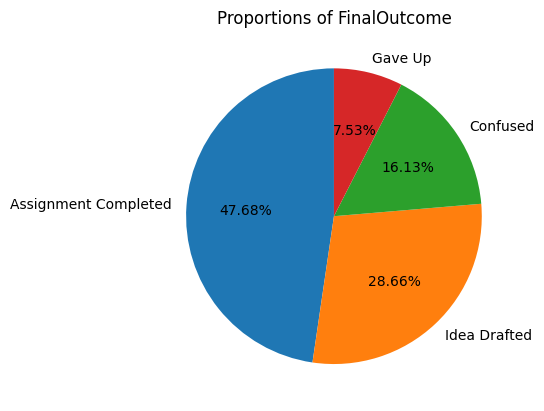

In [15]:
# Create a pie chart showing proportions of FinalOutcome.
counts = df["FinalOutcome"].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90)

plt.title("Proportions of FinalOutcome")
plt.show()

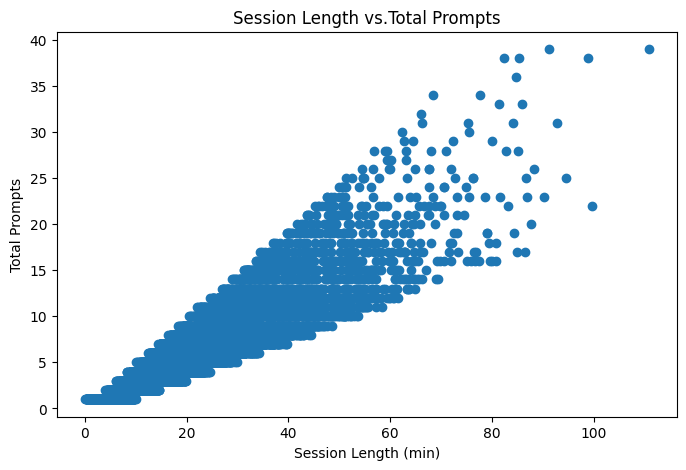

In [16]:
# Draw a scatterplot of SessionLengthMin vs. TotalPrompts.
plt.figure(figsize=(8,5))
plt.scatter(df["SessionLengthMin"],df["TotalPrompts"])
plt.xlabel("Session Length (min)")
plt.ylabel("Total Prompts")
plt.title("Session Length vs.Total Prompts")
plt.show()

Text(0.5, 1.0, 'Line Chart of Average AI Assistance Level over Time')

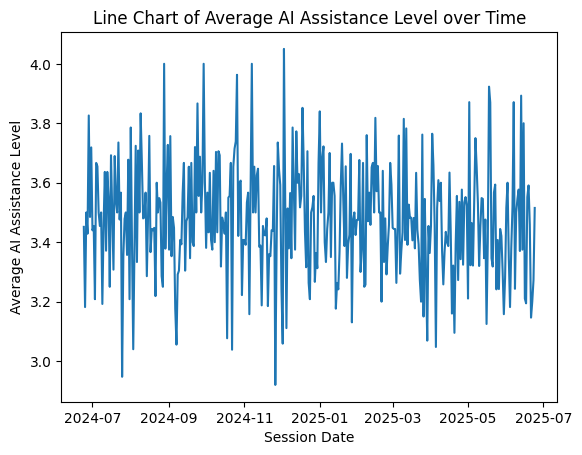

In [17]:
# Plot a line chart of average AI_AssistanceLevel over time (SessionDate).
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
avg_ai_level_over_time = df.groupby('SessionDate')['AI_AssistanceLevel'].mean()
plt.plot(avg_ai_level_over_time.index, avg_ai_level_over_time.values)
plt.xlabel('Session Date')
plt.ylabel('Average AI Assistance Level')
plt.title('Line Chart of Average AI Assistance Level over Time')


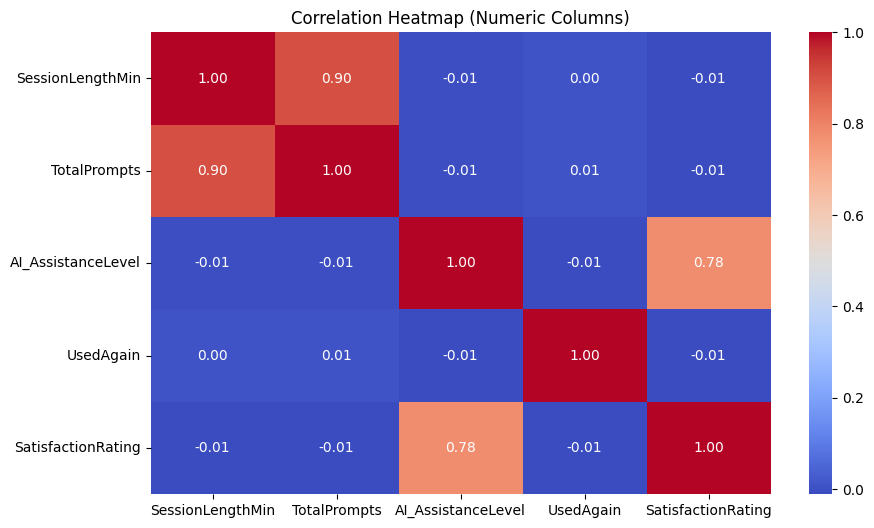

In [18]:
# Create a heatmap of correlations among numeric features.
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

## Part C: GroupBy & Aggregations

In [19]:
# Find the average SessionLengthMin for each TaskType.
avg_sess_len_by_task = df.groupby('TaskType')['SessionLengthMin'].mean().round(2)
avg_sess_len_by_task

,SessionLengthMin
TaskType,
Brainstorming,21.96
Coding,19.47
Homework Help,19.94
Research,20.41
Studying,19.71
Writing,19.71


In [20]:
# Which Discipline had the most sessions?
df['Discipline'].value_counts()

,count
Discipline,
Biology,1458
Computer Science,1445
Engineering,1430
Math,1422
Psychology,1418
History,1417
Business,1410


In [21]:
# Compare average AI_AssistanceLevel across StudentLevel.
avg_ai_assistlevel = df.groupby("StudentLevel")["AI_AssistanceLevel"].mean().round(4)
avg_ai_assistlevel

,AI_AssistanceLevel
StudentLevel,
Graduate,3.4697
High School,3.4771
Undergraduate,3.4836


In [22]:
# Find the most common FinalOutcome for Graduate students.
graduate_data = df[df["StudentLevel"] == "Graduate"]["FinalOutcome"].value_counts()
most_common_finaloutcome = graduate_data.idxmax()
most_common_finaloutcome

'Assignment Completed'

In [23]:
# Calculate the median SessionLengthMin for each FinalOutcome
median_session_len_min = df.groupby('FinalOutcome')['SessionLengthMin'].median()
median_session_len_min

,SessionLengthMin
FinalOutcome,
Assignment Completed,16.570
Confused,16.040
Gave Up,17.290
Idea Drafted,17.085


## Part D: Feature Engineering & Encoding

In [24]:
# Convert SessionDate into Year, Month, and Day columns.
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
df.dtypes

,0
SessionID,object
StudentLevel,object
Discipline,object
SessionDate,datetime64[ns]
SessionLengthMin,float64
TotalPrompts,int64
TaskType,object
AI_AssistanceLevel,int64
FinalOutcome,object
UsedAgain,bool


In [25]:
df['year'] = df['SessionDate'].dt.year
df['month'] = df['SessionDate'].dt.month
df['day'] = df['SessionDate'].dt.day
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,year,month,day
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18


In [26]:
# Encode StudentLevel using Label Encoding.
le = LabelEncoder()
df["StudentLevel_encoded"] = le.fit_transform(df['StudentLevel'])
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,year,month,day,StudentLevel_encoded
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2


In [27]:
# Apply One-Hot Encoding to TaskType.
df = pd.get_dummies(df, columns=['TaskType'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df}\n")
df.head()


One-Hot Encoded Data using Pandas:
         SessionID   StudentLevel        Discipline SessionDate  \
0     SESSION00001  Undergraduate  Computer Science  2024-11-03   
1     SESSION00002  Undergraduate        Psychology  2024-08-25   
2     SESSION00003  Undergraduate          Business  2025-01-12   
3     SESSION00004  Undergraduate  Computer Science  2025-05-06   
4     SESSION00005  Undergraduate        Psychology  2025-03-18   
...            ...            ...               ...         ...   
9995  SESSION09996  Undergraduate        Psychology  2024-07-20   
9996  SESSION09997    High School          Business  2024-11-11   
9997  SESSION09998  Undergraduate           Biology  2024-09-11   
9998  SESSION09999  Undergraduate          Business  2024-10-27   
9999  SESSION10000  Undergraduate              Math  2025-04-16   

      SessionLengthMin  TotalPrompts  AI_AssistanceLevel  \
0                31.20            11                   2   
1                13.09             6    

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,year,month,day,StudentLevel_encoded,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,2,False,False,False,True,False
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,2,False,False,False,True,False
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,2,True,False,False,False,False
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,2,True,False,False,False,False
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,2,False,False,False,False,True


In [28]:
# Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.
df['PromptsPerMinute'] = df['TotalPrompts']/ df['SessionLengthMin']
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,year,month,day,StudentLevel_encoded,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,PromptsPerMinute
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,2,False,False,False,True,False,0.352564
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,2,False,False,False,True,False,0.458365
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,2,True,False,False,False,False,0.260146
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,2,True,False,False,False,False,0.270270
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,2,False,False,False,False,True,0.320057


In [29]:
# Bin SessionLengthMin into categories: Short, Medium, Long.
bins = [0, 30, 60, np.inf]
lab = ['Short', 'Medium', 'Long']

df['SessionLengthMin_category'] = pd.cut(df['SessionLengthMin'], bins=bins, labels=lab, include_lowest=True)

df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,...,month,day,StudentLevel_encoded,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,PromptsPerMinute,SessionLengthMin_category
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,...,11,3,2,False,False,False,True,False,0.352564,Medium
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,...,8,25,2,False,False,False,True,False,0.458365,Short
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,...,1,12,2,True,False,False,False,False,0.260146,Short
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,...,5,6,2,True,False,False,False,False,0.270270,Short
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,...,3,18,2,False,False,False,False,True,0.320057,Short


##  Part E: Machine Learning (Classification Models)

In [30]:
# Drop irrelevant columns
df = df.drop(columns=['SessionID', 'SessionDate', 'StudentLevel'])

# Encode binary column
df['UsedAgain'] = df['UsedAgain'].astype(int)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Discipline', 'SessionLengthMin_category'], drop_first=True)

# Encode target variable
le = LabelEncoder()
df['FinalOutcome_encoded'] = le.fit_transform(df['FinalOutcome'])
df = df.drop(columns=['FinalOutcome'])
df.head()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,UsedAgain,SatisfactionRating,year,month,day,StudentLevel_encoded,TaskType_Coding,...,PromptsPerMinute,Discipline_Business,Discipline_Computer Science,Discipline_Engineering,Discipline_History,Discipline_Math,Discipline_Psychology,SessionLengthMin_category_Medium,SessionLengthMin_category_Long,FinalOutcome_encoded
0,31.20,11,2,1,1.0,2024,11,3,2,False,...,0.352564,False,True,False,False,False,False,True,False,0
1,13.09,6,3,1,2.0,2024,8,25,2,False,...,0.458365,False,False,False,False,False,True,False,False,0
2,19.22,5,3,1,3.3,2025,1,12,2,True,...,0.260146,True,False,False,False,False,False,False,False,0
3,3.70,1,3,1,3.5,2025,5,6,2,True,...,0.270270,False,True,False,False,False,False,False,False,0
4,28.12,9,3,1,2.9,2025,3,18,2,False,...,0.320057,False,False,False,False,False,True,False,False,0


In [53]:
# Predict FinalOutcome using a Decision Tree Classifier.
X = df.drop(columns=['FinalOutcome_encoded'])
y = df['FinalOutcome_encoded']

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

dt_classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_classifier = dt_classifier.fit(X_train,y_train)

y_pred_dt = dt_classifier.predict(X_test)

score = classification_report(y_test, y_pred_dt)
print(score)

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       953
           1       0.24      0.24      0.24       323
           2       0.12      0.15      0.13       151
           3       0.35      0.34      0.35       573

    accuracy                           0.38      2000
   macro avg       0.30      0.31      0.30      2000
weighted avg       0.39      0.38      0.39      2000



In [32]:
# Predict UsedAgain using Logistic Regression.
X2 = df.drop(columns=['UsedAgain'])
y2 = df['UsedAgain']

X2_train, X2_test, y2_train , y2_test = train_test_split(X2,y2, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter= 5000, solver='lbfgs', class_weight='balanced')
log_reg = log_reg.fit(X2_train,y2_train)

y2_pred_lr = log_reg.predict(X2_test)

score_lr = classification_report(y2_test, y2_pred_lr)
print('Classification Report for Logistic Regression: \n',score_lr)

Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.32      0.51      0.39       615
           1       0.70      0.52      0.60      1385

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.59      0.52      0.53      2000



In [33]:
# Train a Random Forest Classifier to predict FinalOutcome.
rf = RandomForestClassifier(n_estimators=300,
                            max_depth=15,
                            min_samples_split=20,
                            class_weight="balanced",
                            random_state=42)
rf = rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

score = classification_report(y_test, y_pred_rf)
print(score)

              precision    recall  f1-score   support

           0       0.57      0.50      0.53       930
           1       0.34      0.43      0.38       349
           2       0.15      0.12      0.13       170
           3       0.38      0.41      0.39       551

    accuracy                           0.43      2000
   macro avg       0.36      0.36      0.36      2000
weighted avg       0.44      0.43      0.43      2000



In [34]:
# Use KNN (K-Nearest Neighbors) to classify UsedAgain.
# Scale features
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X2_train_scaled,y2_train)

y2_pred_knn = knn.predict(X2_test_scaled)

score_knn = classification_report(y2_test, y2_pred_knn)
print('Classification Report for KNN: \n',score_knn)

Classification Report for KNN: 
               precision    recall  f1-score   support

           0       0.38      0.21      0.27       615
           1       0.71      0.85      0.77      1385

    accuracy                           0.65      2000
   macro avg       0.54      0.53      0.52      2000
weighted avg       0.61      0.65      0.62      2000



In [35]:
# Train a Naive Bayes Classifier to predict FinalOutcome.
nb = GaussianNB()

nb = nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

# Evaluate
print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.51      0.85      0.64       930
           1       0.38      0.33      0.35       349
           2       0.18      0.08      0.11       170
           3       0.38      0.05      0.09       551

    accuracy                           0.47      2000
   macro avg       0.36      0.33      0.30      2000
weighted avg       0.42      0.47      0.39      2000



In [36]:
# Build a Gradient Boosting Classifier for UsedAgain.
gb= GradientBoostingClassifier(random_state=42)
gb= gb.fit(X2_train,y2_train)

y2_pred_gb = gb.predict(X2_test)

score_gb = classification_report(y2_test, y2_pred_gb)
print('Classification Report for Gradient Boosting: \n',score_gb)

Classification Report for Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.59      0.46      0.52       615
           1       0.78      0.86      0.82      1385

    accuracy                           0.73      2000
   macro avg       0.68      0.66      0.67      2000
weighted avg       0.72      0.73      0.72      2000



In [47]:
# Split the dataset into 80% training and 20% testing sets.
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Gradient Boosting metrics 

 Accuracy score: 
 0.7345



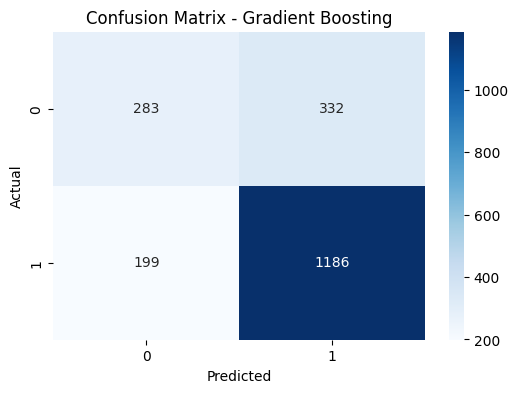

In [42]:
# Evaluate one model using accuracy and a confusion matrix.
print(f"Gradient Boosting metrics \n\n Accuracy score: \n {accuracy_score(y2_test, y2_pred_gb)}\n")
con_matrix = confusion_matrix(y2_test, y2_pred_gb)

plt.figure(figsize=(6,4))
sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

In [48]:
# Generate a classification report (precision, recall, f1-score).
print('Classification Report for Gradient Boosting: \n',score_gb)

Classification Report for Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.59      0.46      0.52       615
           1       0.78      0.86      0.82      1385

    accuracy                           0.73      2000
   macro avg       0.68      0.66      0.67      2000
weighted avg       0.72      0.73      0.72      2000



## Part F: Model Evaluation & Hyperparameter Tuning

In [46]:
# Perform cross-validation for Logistic Regression.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

cv_results = cross_validate(log_reg, X2, y2, cv=cv, scoring=scoring)

print("Mean Accuracy:", cv_results['test_accuracy'].mean())
print("Mean Precision:", cv_results['test_precision'].mean())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Mean F1:", cv_results['test_f1'].mean())

Mean Accuracy: 0.5281
Mean Precision: 0.7290466766158131
Mean Recall: 0.528457524123427
Mean F1: 0.6125992963050437


In [54]:
# Use GridSearchCV to tune hyperparameters of a Decision Tree.
# Hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Stratified CV (preserves class balance)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid,
    scoring='f1_macro',  # macro for multi-class;'f1' if binary
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Fit search
grid_search.fit(X_train, y_train)

# Best parameters & CV score
print("Best Parameters:", grid_search.best_params_)
print("Best CV F1 Score:", grid_search.best_score_)

# Evaluate on test set
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best CV F1 Score: 0.3453736080644652
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.59      0.33      0.42       953
           1       0.36      0.33      0.35       323
           2       0.19      0.35      0.25       151
           3       0.38      0.59      0.46       573

    accuracy                           0.40      2000
   macro avg       0.38      0.40      0.37      2000
weighted avg       0.46      0.40      0.41      2000



In [55]:
# Tune a Random Forest Classifier (n_estimators, max_depth).
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],# number of trees
    'max_depth': [None, 10, 20, 30] # tree depth
}

# Stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Fit search
grid_search.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters:", grid_search.best_params_)
print("Best CV F1 Score:", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Best CV F1 Score: 0.36593187432503743
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.56      0.49      0.52       953
           1       0.33      0.46      0.38       323
           2       0.20      0.14      0.16       151
           3       0.35      0.39      0.37       573

    accuracy                           0.43      2000
   macro avg       0.36      0.37      0.36      2000
weighted avg       0.44      0.43      0.43      2000



In [60]:
# Compare Logistic Regression, Decision Tree, Random Forest, Naive Bayes, KNN, Gradient Boosting, and XGBoost for predicting UsedAgain.
# Define models
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs', class_weight='balanced')
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, class_weight='balanced', n_jobs=-1)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(n_estimators=200, random_state=42)

models = [log_reg, dt, rf, nb, knn, gb, xgb]

for model in models:
  print(f"Training model: {model}")
  print("*"*65)
  mol = model.fit(X2_train, y2_train)
  print(f"Predicting with model: {model}")
  print("*"*65)
  pred = mol.predict(X2_test)
  print(f"Classification Report For Model: {model}")
  print("*"*65)
  print(classification_report(y2_test, pred))
  print("*"*65)


Training model: LogisticRegression(class_weight='balanced', max_iter=5000)
*****************************************************************
Predicting with model: LogisticRegression(class_weight='balanced', max_iter=5000)
*****************************************************************
Classification Report For Model: LogisticRegression(class_weight='balanced', max_iter=5000)
*****************************************************************
              precision    recall  f1-score   support

           0       0.32      0.51      0.39       615
           1       0.70      0.52      0.60      1385

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.59      0.52      0.53      2000

*****************************************************************
Training model: DecisionTreeClassifier(class_weight='balanced', random_state=42)
*****************************************************************
Predicting wi

In [61]:
results = []

for model in models:
    print(f"Training model: {model.__class__.__name__}")
    model.fit(X2_train, y2_train)
    pred = model.predict(X2_test)

    print(classification_report(y2_test, pred))
    print("*" * 65)

    # Store summary metrics
    acc = accuracy_score(y2_test, pred)
    f1 = f1_score(y2_test, pred, average="macro")
    prec = precision_score(y2_test, pred, average="macro")
    rec = recall_score(y2_test, pred, average="macro")
    results.append([model.__class__.__name__, acc, prec, rec, f1])

# Comparison table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision (Macro)", "Recall (Macro)", "F1 (Macro)"])
print("\nModel Comparison:")
results_df.sort_values(by="F1 (Macro)", ascending=False)

Training model: LogisticRegression
              precision    recall  f1-score   support

           0       0.32      0.51      0.39       615
           1       0.70      0.52      0.60      1385

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.59      0.52      0.53      2000

*****************************************************************
Training model: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.40      0.39      0.39       615
           1       0.73      0.74      0.73      1385

    accuracy                           0.63      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.63      0.63      0.63      2000

*****************************************************************
Training model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.61      0.29      0.39   

,Model,Accuracy,Precision (Macro),Recall (Macro),F1 (Macro)
5,GradientBoostingClassifier,0.7350,0.684984,0.654081,0.663088
6,XGBClassifier,0.7065,0.643794,0.615876,0.622141
2,RandomForestClassifier,0.7235,0.674862,0.602386,0.605753
1,DecisionTreeClassifier,0.6310,0.564454,0.563623,0.564003
4,KNeighborsClassifier,0.6325,0.510919,0.507302,0.495940
0,LogisticRegression,0.5160,0.511194,0.513134,0.494768
3,GaussianNB,0.6665,0.487145,0.496595,0.444115
